In [1]:
import warnings
warnings.filterwarnings("ignore")

# 🕹 Jupyter Widgets

<br>

EOmaps provides a set of pre-configured [Jupyter Widgets][jupyter_widgets] that can be used to create interactive browser controls for a map. 

These widgets work just like any other [Jupyter Widgets][jupyter_widgets], but they have a pre-configured handler to perform commonly used tasks (switching layers, overlay layers, add/remove callbacks etc.)


:::::{note}

Widgets are intended for **Jupyter Notebooks** and require the additional dependencies: `ipywidgets` and `ipympl`.  
They will only work if you use the interactive [ipympl (widget) backend][ipympl]. To activate, use the ``%matplotlib widget`` magic command.

You can install the required additional dependencies with one of the following commands:
::::{grid} 1 1 2 2

::: {grid-item-card}

```
pip install ipywidgets, ipympl
```
:::
::: {grid-item-card}

```
mamba install -c conda-forge ipywidgets, ipympl
```
:::
::::
:::::

[jupyter_widgets]: https://ipywidgets.readthedocs.io
[ipympl]: https://matplotlib.org/ipympl/

## Layer selector widgets

Layer selector widgets can be used to change the visible layer of a map.

:::{dropdown} Available widgets
:open:

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   LayerDropdown
   LayerSelect
   LayerSelectMultiple

.. autosummary:: 
   :nosignatures:

   LayerSelectionSlider
   LayerSelectionRangeSlider
   
.. autosummary:: 
   :nosignatures:

   LayerButton
   LayerRadioButtons
   LayerToggleButtons

.. autosummary:: 
   :nosignatures:
   
   LayerOverlaySlider

```
:::

### How to use the widgets

To attach a widget to a map, all you need to do is to pass the associated [`Maps`](eomaps.Maps) object as first argument on initialization.
(e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

In addition to the ipywidget-arguments, they support the following (optional) arguments:

- `layers`: A list of layer specs `[<specs 1>, <specs 2>, ...]` to use in the widget.  
  `<specs>`can be one of:
    - A single layer-name `"layer_name"` or a tuple `("layer_name", transparency)`
    - A tuple of multiple layer-names (and/or transparencies): `("layer_name_1", ("layer_name_2", 0.5), ...)`
    - A list of a custom labels and a layer-assignments: `["Custom label", <layer specs>]`


For example, here's how you can connect the available layer-selection widgets to the following map:

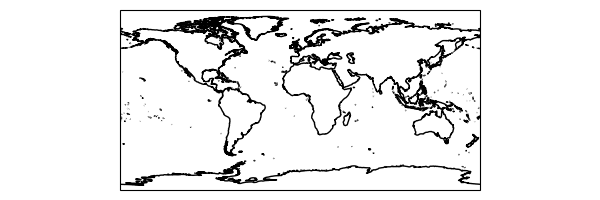

In [2]:
%matplotlib widget
from eomaps import Maps, widgets

m = Maps(figsize=(6, 2), layer="coastline")
m.add_feature.preset.coastline()

m.add_feature.preset.countries(layer="countries")
m.add_feature.preset.ocean(layer="ocean")
m.show()

In [3]:
button = widgets.LayerButton(m, layer="ocean")
toggle_buttons = widgets.LayerToggleButtons(m)
radio_buttons = widgets.LayerRadioButtons(m)
select_single = widgets.LayerSelect(m)
select_multi = widgets.LayerSelectMultiple(m)
dropdown = widgets.LayerDropdown(m)
slider = widgets.LayerSelectionSlider(m)
range_slider = widgets.LayerSelectionRangeSlider(m)

In [4]:
display(button, toggle_buttons, dropdown, radio_buttons, select_single, select_multi, slider, range_slider)

LayerButton(description='ocean', style=ButtonStyle())

LayerToggleButtons(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerDropdown(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerRadioButtons(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerSelect(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerSelectMultiple(description='Layers', index=(0, 0), options=('coastline', 'countries', 'ocean'), value=('c…

LayerSelectionSlider(description='Layers', options=('coastline', 'countries', 'ocean'), value='coastline')

LayerSelectionRangeSlider(description='Layers', index=(0, 0), options=('coastline', 'countries', 'ocean'), val…

:::{tip}
You can also specify custom labels or use combined-layer assignments.

In addition, you can style the widgets as any other Jupyter Widget (more info in the [Widget Styling](https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20Styling.html#) section of the ipywidgets docs.)



In [5]:
custom_selector = widgets.LayerSelectMultiple(
    m,
    layers=[["A nice coastline", "coastline"], 
            ["Overlay 'coastline' + 'ocean'", ("coastline", "ocean")],
            ["Transparent overlay: 'coastline' + 'ocean'", ("coastline", ("ocean", 0.4))]
           ],
    layout=dict(width='50%', height='80px', )
)
custom_selector

LayerSelectMultiple(description='Layers', index=(0, 0), layout=Layout(height='80px', width='50%'), options=(('…

In [6]:
custom_button = widgets.LayerButton(m, layer="ocean", description="Custom Ocean Button", layout=dict(width="30ex", height="5ex"))
custom_button.style.button_color = 'lightblue'
custom_button.style.font_weight = 'bold'
custom_button.style.font_size = '24px'
custom_button

LayerButton(description='Custom Ocean Button', layout=Layout(height='5ex', width='30ex'), style=ButtonStyle(bu…

## Callback Widgets

Callback widgets are used to toggle callbacks on a map.

:::{dropdown} Available Widgets:
:open:

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   ClickAnnotateCheckbox
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox
   ClickPeekLayerCheckbox


.. autosummary:: 
   :nosignatures:
   
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox


.. autosummary:: 
   :nosignatures:
   
   PickAnnotateCheckbox
   PickMarkCheckbox
   PickPrintToConsoleCheckbox

:::

### How to use the widgets

To attach a widget to a map, all you need to do is to pass the associated [`Maps`](eomaps.Maps) object as first argument on initialization.
(e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

All additional arguments will be passed to the corresponding callback (e.g. `m.cb.< METHOD >.attach.< NAME >(**kwargs)`)

In [7]:
checkboxes = [
    widgets.ClickAnnotateCheckbox(m),
    widgets.ClickMarkCheckbox(m),
    widgets.ClickPrintToConsoleCheckbox(m),
    widgets.ClickPeekLayerCheckbox(m, layer="ocean"),
    widgets.ClickMarkCheckbox(m),
    widgets.ClickPrintToConsoleCheckbox(m),
    widgets.PickAnnotateCheckbox(m),
    widgets.PickMarkCheckbox(m),
    widgets.PickPrintToConsoleCheckbox(m)
]

In [8]:
display(*checkboxes)

ClickAnnotateCheckbox(value=False, description='Annotate (Click)')

ClickMarkCheckbox(value=False, description='Mark (Click)')

ClickPrintToConsoleCheckbox(value=False, description='Print (Click)')

ClickPeekLayerCheckbox(value=False, description="Peek Layer: 'ocean'")

ClickMarkCheckbox(value=False, description='Mark (Click)')

ClickPrintToConsoleCheckbox(value=False, description='Print (Click)')

PickAnnotateCheckbox(value=False, description='Annotate (Pick)')

PickMarkCheckbox(value=False, description='Mark (Pick)')

PickPrintToConsoleCheckbox(value=False, description='Print (Pick)')